In [35]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import glob

import warnings
warnings.filterwarnings("ignore")


<font color=black size=6 face=雅黑>**标普矿点数据数据探索报告**</font>


In [36]:
import plotly.offline as pyo
pyo.init_notebook_mode()


In [37]:
%%html
<style>
table {float:center}
</style>

In [38]:
import plotly.express as px
import plotly.graph_objs as go


In [39]:
import plotly.io as pio
pio.renderers.default='notebook'

In [40]:
import seaborn as sns
sns.set(color_codes=True)#导入seaborn包设定颜色

import matplotlib.pyplot as plt

%matplotlib inline


# 数据准备

In [41]:
f1 = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/SPGlobal_general_info.xlsx'


In [42]:
main = pd.read_excel(f1)

print('------------'*5, '\n示例')
main.head()
print('------------'*5,'\nDataFrame大小')
print(main.shape)


------------------------------------------------------------ 
示例


prop_name  prop_id  prop_id.1               prop_name.1  \
0        Chihuahua Refinery    86959      86959        Chihuahua Refinery   
1                       101    64665      64665                       101   
2                      1068    79522      79522                      1068   
3  10th of Ramadan Refinery    86452      86452  10th of Ramadan Refinery   
4   10th of Ramadan Smelter    86451      86451   10th of Ramadan Smelter   

  also_known_as primary_commodity    dev_stage actv_status  yr_source_date  \
0           NaN              Lead    Operating      Active          2020.0   
1           NaN              Coal    Operating         NaN          2011.0   
2           NaN              Gold  Exploration      Active          2020.0   
3           NaN              Lead    Operating      Active          2021.0   
4           NaN              Lead    Operating      Active          2021.0   

   mo_source_date mo_yr_source_date mine_type1 mine_type2 mine_type3  \
0             2.0           02/2020        NaN        NaN        NaN   
1            12.0           12/2011        NaN        NaN        NaN   
2            10.0           10/2020        NaN        NaN        NaN   
3             2.0           02/2021        NaN        NaN        NaN   
4             2.0           02/2021        NaN        NaN        NaN   

         commodities_list  
0                    Lead  
1                    Coal  
2  Gold,Copper,Molybdenum  
3                    Lead  
4                    Lead

------------------------------------------------------------ 
DataFrame大小
(39135, 15)


In [43]:
t = plt.figure(figsize=(10, 20))
ax = sns.countplot(y="primary_commodity", data=main, order=main['primary_commodity'].value_counts().index, orient='v')
t = plt.xticks(rotation=45)
print('------------'*5, '\n主要包括以下矿物')


------------------------------------------------------------ 
主要包括以下矿物


In [44]:
from wordcloud import WordCloud
import numpy as np
import jieba
wcd=WordCloud(background_color=None,repeat=True,max_words=40,height=240,width=600,
            max_font_size=30,colormap="Reds",
             mode="RGBA")

text=' '.join((main['primary_commodity'].unique()))

ss=" ".join(jieba.lcut(text))
t = wcd.generate(ss)

print('------------'*5, '\n wordcloud如下')
wcd.to_image()


------------------------------------------------------------ 
 wordcloud如下


In [45]:
print('矿点总数量：', main.shape[0])
main = main[(main['primary_commodity']=='Nickel')|(main['commodities_list'].str.contains('Nickel'))|(main['commodities_list'].str.contains('nickel'))]
print('镍矿总数量（commodities_list包含镍）：', main.shape[0])


矿点总数量： 39135
镍矿总数量（commodities_list包含镍）： 2354


In [46]:
output_path = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/'
files = glob.glob(output_path + '*.xlsx')
dic = []

print('------------'*5, '\n Loading data')
for f in files:
    section = f.split('cleaned_data/SPGlobal_')[-1].split('.xlsx')[0]
#     print(section)
    if f!='/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/SPGlobal_general_info.xlsx':
        temp = pd.read_excel(f)
        dic += [(section, i) for i in temp.columns]
        main = pd.merge(main, temp, how='left', on=['prop_id', 'prop_name'])


------------------------------------------------------------ 
 Loading data


In [47]:
feature_dic = pd.DataFrame(dic).set_index(0)


In [48]:
# main = main.drop(main.isnull().mean()[main.isnull().mean()>0.9].index.tolist(), axis=1)


In [49]:
# main = main[main['primary_commodity']=='Nickel']

In [50]:
main.head()

prop_name  prop_id  prop_id.1    prop_name.1  \
0      113 North    87482      87482      113 North   
1         1514-M    29336      29336         1514-M   
2  167 EXTENSION    52308      52308  167 EXTENSION   
3     8 Mile Dam    86297      86297     8 Mile Dam   
4    Abdul Qadir    65652      65652    Abdul Qadir   

                                       also_known_as primary_commodity_x  \
0                                                NaN              Nickel   
1                                                NaN              Nickel   
2  167, Central Block, James Bay, KM105, KM107, K...                Gold   
3                                           E29/1080              Nickel   
4                                                NaN                Gold   

        dev_stage actv_status  yr_source_date  mo_source_date  \
0  Target Outline      Active          2021.0             6.0   
1  Target Outline    Inactive          1995.0             9.0   
2  Target Outline      Active          2019.0            11.0   
3  Target Outline      Active          2021.0             7.0   
4      Grassroots      Active          2014.0             2.0   

  mo_yr_source_date mine_type1 mine_type2 mine_type3  \
0           06/2021        NaN        NaN        NaN   
1           09/1995   Open Pit        NaN        NaN   
2           11/2019        NaN        NaN        NaN   
3           07/2021        NaN        NaN        NaN   
4           02/2014        NaN        NaN        NaN   

                                 commodities_list  interval_grade_g_per_tonne  \
0  Nickel,Copper,Gold,Platinum,Palladium,Iron Ore                         NaN   
1                            Nickel,Copper,Cobalt                         NaN   
2                  Gold,Silver,Copper,Zinc,Nickel                         NaN   
3                                   Nickel,Copper                         NaN   
4                    Gold,Copper,Zinc,Lead,Nickel                         NaN   

   grade_x_interval_g_per_tonne  interval_grade_equiv_g_per_tonne  \
0                           NaN                               NaN   
1                           NaN                               NaN   
2                           NaN                               NaN   
3                           NaN                               NaN   
4                           NaN                               NaN   

   grade_equiv_x_interval_g_per_tonne  interval_grade_pct  \
0                                 NaN                 NaN   
1                                 NaN                 NaN   
2                                 NaN                 NaN   
3                                 NaN                 NaN   
4                                 NaN                 NaN   

   grade_x_interval_pct  interval_grade_equiv_pct  grade_equiv_x_interval_pct  \
0                   NaN                       NaN                         NaN   
1                   NaN                       NaN                         NaN   
2                   NaN                       NaN                         NaN   
3                   NaN                       NaN                         NaN   
4                   NaN                       NaN                         NaN   

   interval_grade_ppm  grade_x_interval_ppm  interval_grade_equiv_ppm  \
0                 NaN                   NaN                       NaN   
1                 NaN                   NaN                       NaN   
2                 NaN                   NaN                       NaN   
3                 NaN                   NaN                       NaN   
4                 NaN                   NaN                       NaN   

   grade_equiv_x_interval_ppm  millhead_grade_g_per_tonne  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                       

In [51]:
# import pandas_profiling
# pandas_profiling.ProfileReport(main)


# 基于所有矿点的基本信息和位置信息

## 所有含镍矿点的地域分布

In [52]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(main.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" ,},
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [53]:
labels = main['country_name'].value_counts().index.tolist()[:9]
main.loc[:, 'country_name_new'] = main.loc[:, 'country_name']
main.loc[~main['country_name'].isin(labels), 'country_name_new'] = 'others'


------------------------------------------------------------ 
矿点的国家分布


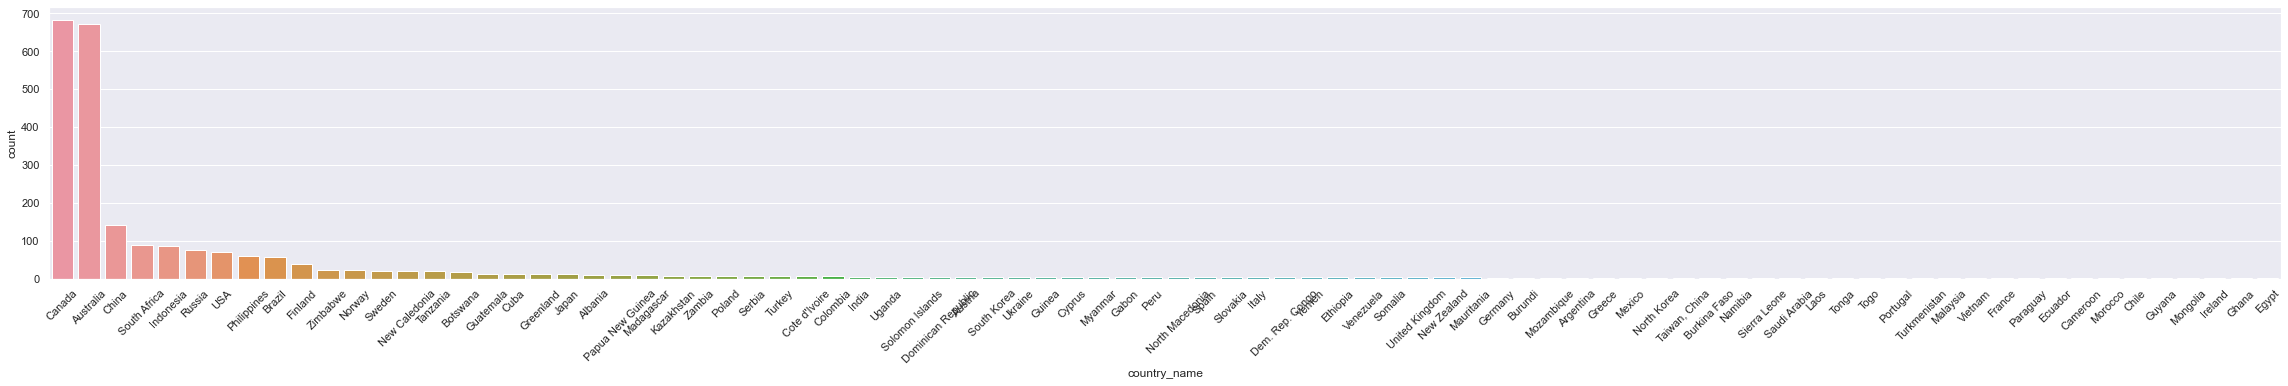

In [54]:
print('------------'*5, '\n矿点的国家分布')
t = plt.figure(figsize=(40, 5))
ax = sns.countplot(x="country_name", data=main, order=main['country_name'].value_counts().index)
t = plt.xticks(rotation=45)


In [55]:
labels = main['country_name_new'].value_counts().index.tolist()
sizes = main['country_name_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


------------------------------------------------------------ 
矿点的地域分布


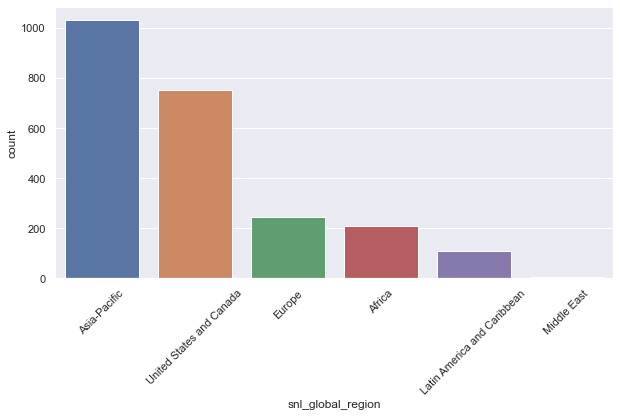

In [56]:
print('------------'*5, '\n矿点的地域分布')
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="snl_global_region", data=main, order=main['snl_global_region'].value_counts().index)
t = plt.xticks(rotation=45)


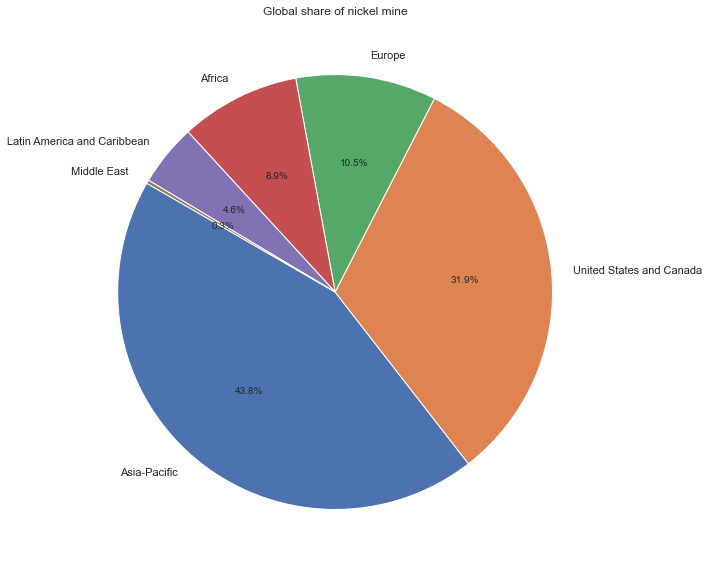

In [57]:
labels = main['snl_global_region'].value_counts().index.tolist()
sizes = main['snl_global_region'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


## 判断主要矿产是否为镍

In [58]:
main['is_nickel_primary'] = (main['primary_commodity']=='Nickel').astype(int)


In [59]:
print('主要产品为镍的矿点数量')
main['is_nickel_primary'].value_counts()


主要产品为镍的矿点数量


1    1399
0     955
Name: is_nickel_primary, dtype: int64

In [60]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['is_nickel_primary']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'The Distribution of Nickel Mines',
                        color = 'is_nickel_primary',
                        zoom = 1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [61]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [62]:
def calculate_based_on_region(snl_global_region=None):
    if snl_global_region is not None:
        temp = main[main['snl_global_region']==snl_global_region]
    else:
        temp = main.copy()

    item_lst = temp['commodities_list'].map(lambda x: x.split(',')+['Nickel']).tolist()

    te = TransactionEncoder()
    te_ary = te.fit(item_lst).transform(item_lst)
    temp = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(temp, min_support=0.1, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    res = frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                             (frequent_itemsets['support'] >= 0.5) ]
    return res.sort_values(by='support', ascending=False)


In [63]:
print('\n------------------------------\n各地区矿产伴生情况\n', '\nglobal')
calculate_based_on_region()


------------------------------
各地区矿产伴生情况
 
global


support          itemsets  length
15  0.624894  (Nickel, Copper)       2

In [64]:
for i in main['snl_global_region'].unique():
    print('\n------------------------------\n', i)
    calculate_based_on_region(i)


------------------------------
 United States and Canada


support          itemsets  length
16  0.80984  (Nickel, Copper)       2


------------------------------
 Asia-Pacific


Empty DataFrame
Columns: [support, itemsets, length]
Index: []


------------------------------
 Africa


support                               itemsets  length
23   0.776190                       (Nickel, Copper)       2
29   0.576190                         (Nickel, Gold)       2
40   0.576190                     (Nickel, Platinum)       2
25   0.552381                     (Platinum, Copper)       2
81   0.552381             (Platinum, Nickel, Copper)       3
21   0.547619                         (Gold, Copper)       2
39   0.547619                    (Nickel, Palladium)       2
43   0.547619                  (Palladium, Platinum)       2
70   0.547619                 (Nickel, Gold, Copper)       3
115  0.547619          (Nickel, Palladium, Platinum)       3
24   0.523810                    (Palladium, Copper)       2
80   0.523810            (Nickel, Palladium, Copper)       3
84   0.523810          (Platinum, Palladium, Copper)       3
166  0.523810  (Platinum, Nickel, Palladium, Copper)       4


------------------------------
 Europe


support          itemsets  length
15  0.650407  (Nickel, Copper)       2


------------------------------
 Latin America and Caribbean


Empty DataFrame
Columns: [support, itemsets, length]
Index: []


------------------------------
 Middle East


support                               itemsets  length
16   0.833333                       (Nickel, Copper)       2
15   0.500000                         (Gold, Copper)       2
17   0.500000                    (Palladium, Copper)       2
18   0.500000                     (Platinum, Copper)       2
21   0.500000                         (Nickel, Gold)       2
25   0.500000                    (Nickel, Palladium)       2
26   0.500000                     (Nickel, Platinum)       2
29   0.500000                  (Palladium, Platinum)       2
53   0.500000                 (Nickel, Gold, Copper)       3
57   0.500000            (Nickel, Palladium, Copper)       3
58   0.500000             (Platinum, Nickel, Copper)       3
61   0.500000          (Platinum, Palladium, Copper)       3
72   0.500000          (Nickel, Palladium, Platinum)       3
111  0.500000  (Platinum, Nickel, Palladium, Copper)       4

各个地区是否是镍为主矿产

In [65]:
tmp = main.groupby(['country_name_new']).apply(lambda x: x['is_nickel_primary'].value_counts(normalize=True)).unstack().fillna(0)
tmp.columns = ['N', 'Y']
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


In [66]:
tmp = main.groupby(['snl_global_region']).apply(lambda x: x['is_nickel_primary'].value_counts(normalize=True)).unstack().fillna(0)
tmp.columns = ['N', 'Y']
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


### 镍矿的地域分布

以下以镍矿为例，来介绍标普矿点数据包含的信息维度

In [67]:
main = main[main['is_nickel_primary']==1]


In [68]:
# token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

# fig = px.density_mapbox(main[main['is_nickel_primary']==1].dropna(subset=['actv_status']),
#                         lon = 'longitude',
#                         lat = 'latitude',
#                         title = 'nickel mine distribution',
#                         zoom = 2,
#                         radius = 10, 
#                         color_continuous_scale = px.colors.carto.Temps )
# fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" ,},
#                  title = dict(x=0.5,xref='paper'),
#                  margin={'l':10,"r":0,'t':50,'b':10})


In [69]:
# t = plt.figure(figsize=(10, 5))
# ax = sns.countplot(x="country_name_new", data=main[(main['is_nickel_primary']==1)], order=main[(main['is_nickel_primary']==1)]['country_name_new'].value_counts().index)


In [70]:
# labels = main[main['is_nickel_primary']==1]['country_name_new'].value_counts().index.tolist()
# sizes = main[main['is_nickel_primary']==1]['country_name_new'].value_counts().values
# t = plt.figure(figsize=(10, 10))
# t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
# t = plt.title("Global share of nickel mine")


In [71]:
# t = plt.figure(figsize=(10, 5))
# ax = sns.countplot(x="snl_global_region", data=main[(main['is_nickel_primary']==1)], order=main[(main['is_nickel_primary']==1)]['snl_global_region'].value_counts().index)


In [72]:
# labels = main[main['is_nickel_primary']==1]['snl_global_region'].value_counts().index.tolist()
# sizes = main[main['is_nickel_primary']==1]['snl_global_region'].value_counts().values
# t = plt.figure(figsize=(10, 10))
# t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
# t = plt.title("Global share of nickel mine")


## 矿点活跃状态

当前矿点活跃状态的分布

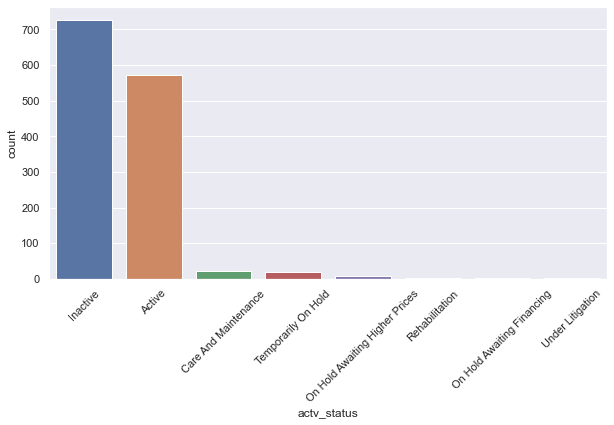

In [73]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="actv_status", data=main, order=main['actv_status'].value_counts().index)
t = plt.xticks(rotation=45)


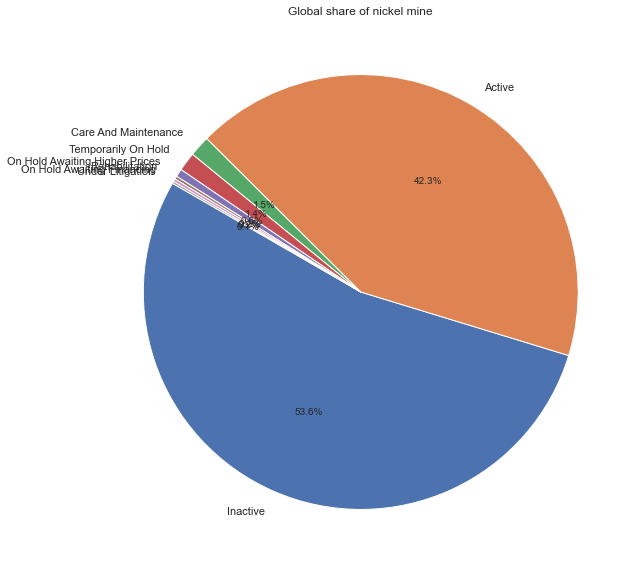

In [74]:
labels = main['actv_status'].value_counts().index.tolist()
sizes = main['actv_status'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


各阶段矿点的全球分布情况

In [75]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'The Distribution of Nickel Mines',
                        color = 'actv_status',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [76]:
tmp = main.groupby(['country_name_new']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


In [77]:
tmp = main.groupby(['snl_global_region']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


### 活跃镍矿点的地域分布

In [78]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(main[main['is_nickel_primary']==1].dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


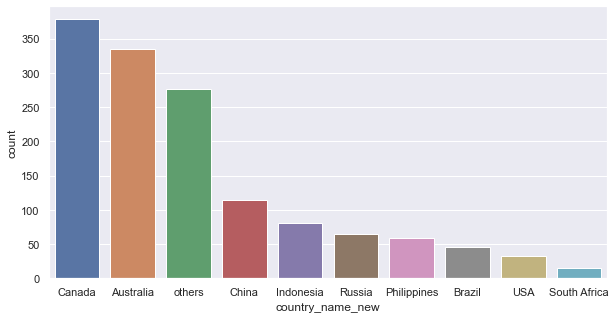

In [79]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="country_name_new", data=main[(main['is_nickel_primary']==1)], order=main[(main['is_nickel_primary']==1)]['country_name_new'].value_counts().index)


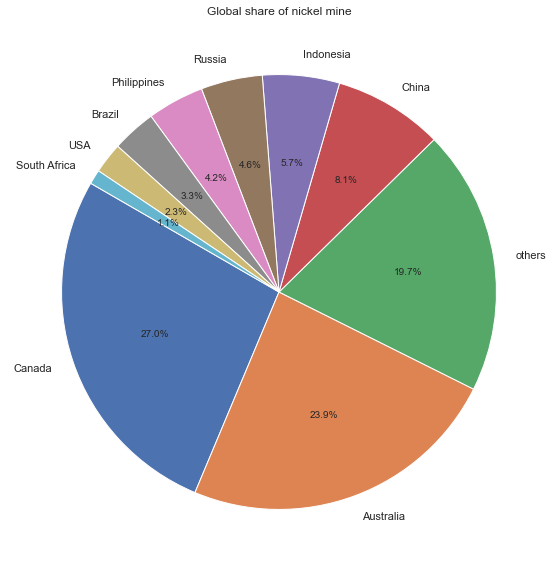

In [80]:
labels = main[main['is_nickel_primary']==1]['country_name_new'].value_counts().index.tolist()
sizes = main[main['is_nickel_primary']==1]['country_name_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [81]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="snl_global_region", data=main[(main['is_nickel_primary']==1)], order=main[(main['is_nickel_primary']==1)]['snl_global_region'].value_counts().index)


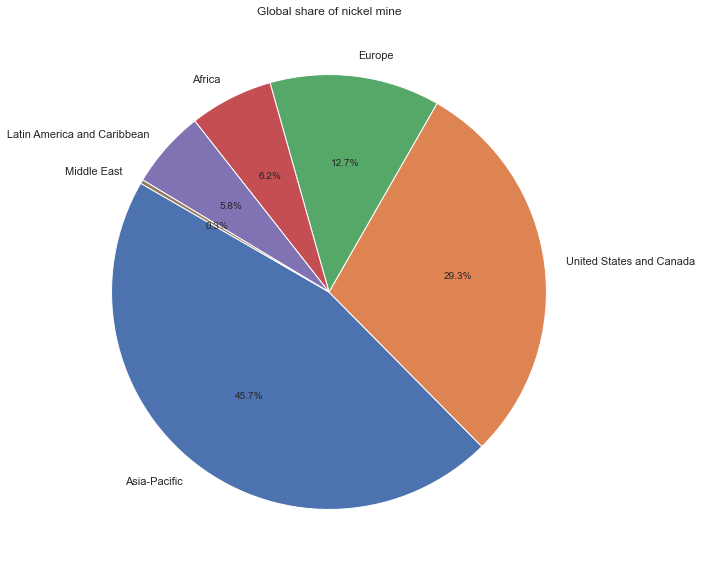

In [82]:
labels = main[main['is_nickel_primary']==1]['snl_global_region'].value_counts().index.tolist()
sizes = main[main['is_nickel_primary']==1]['snl_global_region'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


以下限定为活跃状态的矿点

In [83]:
# main = main[main['actv_status']=='Active']

## 矿点类型

In [84]:
print('空值率:', np.round(main['mine_type1'].isnull().mean(), 4))

空值率: 0.7184


In [85]:
labels = main['mine_type1'].value_counts().index.tolist()
main.loc[:, 'mine_type1_new'] = main.loc[:, 'mine_type1']
main.loc[~main['mine_type1'].isin(labels), 'mine_type1_new'] = 'others'


In [86]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="mine_type1_new", data=main, order=main['mine_type1_new'].value_counts().index)


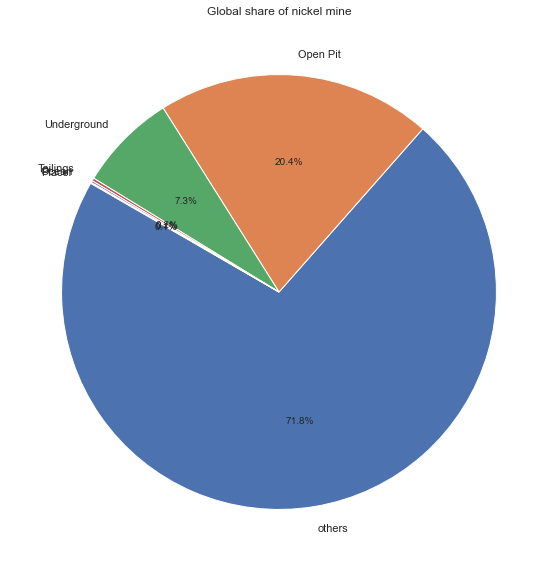

In [87]:
labels = main['mine_type1_new'].value_counts().index.tolist()
sizes = main['mine_type1_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [88]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [89]:
# token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [90]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mdistribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 发展阶段

In [91]:
labels = main['dev_stage'].value_counts().index.tolist()[:9]
main.loc[:, 'dev_stage_new'] = main.loc[:, 'dev_stage']
main.loc[~main['dev_stage'].isin(labels), 'dev_stage_new'] = 'others'


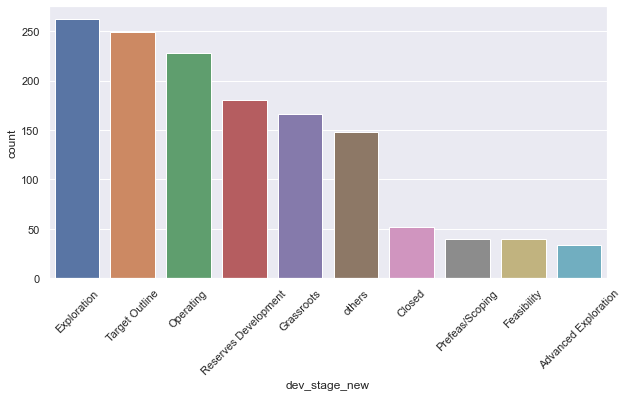

In [92]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="dev_stage_new", data=main, order=main['dev_stage_new'].value_counts().index)
t = plt.xticks(rotation=45)

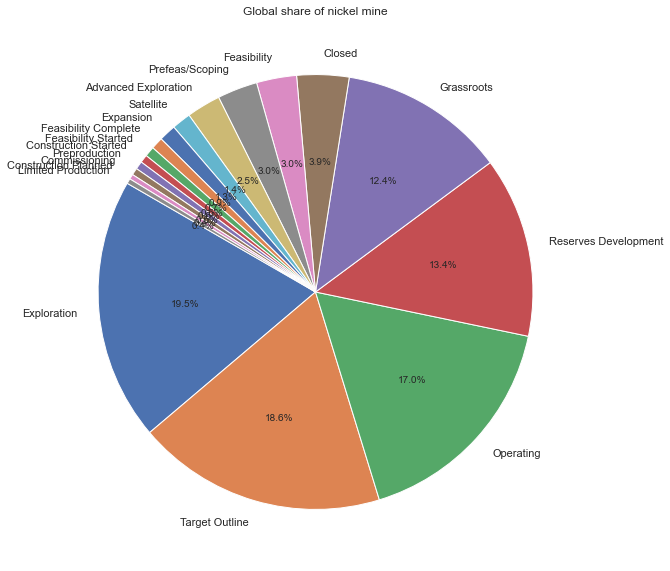

In [93]:
labels = main['dev_stage'].value_counts().index.tolist()
sizes = main['dev_stage'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [94]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'dev_stage_new',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 信息更新时间

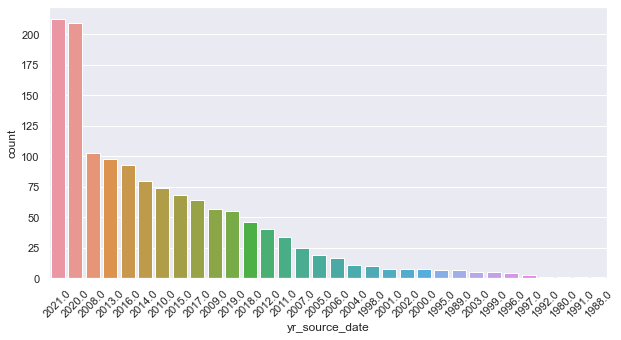

In [95]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="yr_source_date", data=main, order=main['yr_source_date'].value_counts().index)
t = plt.xticks(rotation=45)


In [96]:
labels = main['yr_source_date'].value_counts().index.tolist()
sizes = main['yr_source_date'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


# 矿点地质信息

In [97]:
col = feature_dic.loc[['technology_geology']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id   zone_name geology_region  \
0                 113 North    87482   113 North            NaN   
1                    1514-M    29336         NaN            NaN   
3                8 Mile Dam    86297  8 Mile Dam            NaN   
8                     Acoje    31679       Acoje            NaN   
11  Adlay-Cagdianao-Tandawa    37537         ACT            NaN   

                                     geology_comments  avg_depth_geologic_dep  \
0                                                 NaN                     NaN   
1                                                 NaN                     NaN   
3                                                 NaN                     NaN   
8   The ultramafic complex is a fairly complete se...                     NaN   
11                                                NaN                     NaN   

                geologic_ore_body_type                           ore_minerals  
0                                  NaN  Chalcopyrite, Pentlandite, Pyrrhotite  
1                                  NaN                                    NaN  
3   Layered Mafic-Ultramafic Intrusion                                    NaN  
8                   Laterite (Generic)                      Chromite, Sulfide  
11                  Laterite (Generic)                                    NaN

------------------------------------------------------------ 
缺失率统计


prop_name                   0.00
prop_id                     0.00
zone_name                  62.04
geology_region            100.00
geology_comments           74.34
avg_depth_geologic_dep     99.07
geologic_ore_body_type     79.70
ore_minerals               79.99
dtype: object

矿石类型的分布

In [98]:
temp = main['geologic_ore_body_type'].str.split(',', expand=True).add_prefix('geologic_ore_body_type')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['geologic_ore_body_type'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['geologic_ore_body_type', 'count']

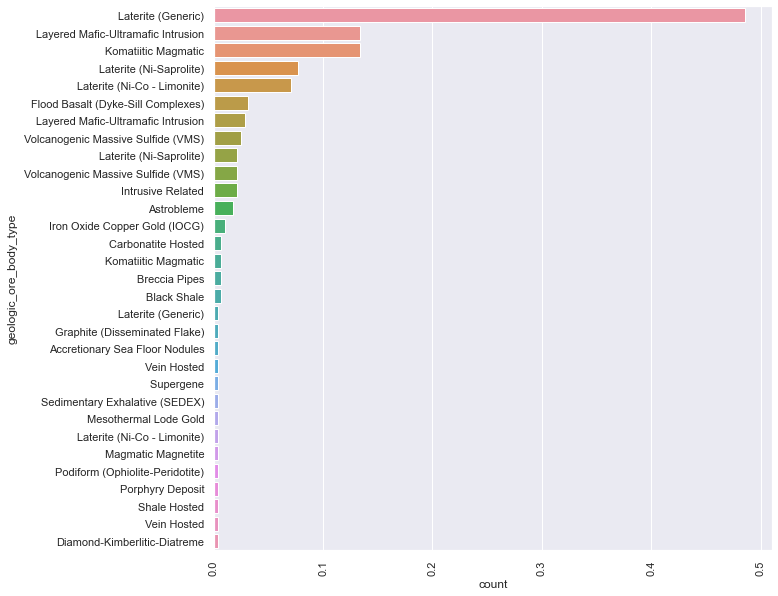

In [99]:
t = plt.figure(figsize=(10, 10))
ax = sns.barplot(y="geologic_ore_body_type", x='count', data=temp, orient='h')
t = plt.xticks(rotation=90)


In [107]:
main['is_laterite'] = main['geologic_ore_body_type'].str.contains('Laterite').astype(float)
main['is_saprolite'] = main['geologic_ore_body_type'].str.contains('Saprolite').astype(float)

In [100]:
main['temp'] = main['geologic_ore_body_type'].str.contains('Laterite')

token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['temp']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mdistribution',
                        color = 'temp',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [101]:
main['temp'] = main['geologic_ore_body_type'].str.contains('Intrusion')

token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['temp']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mdistribution',
                        color = 'temp',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


矿石矿物质的分布

In [102]:
temp = main['ore_minerals'].str.split(',', expand=True).add_prefix('ore_minerals')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['ore_minerals'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['ore_minerals', 'count']


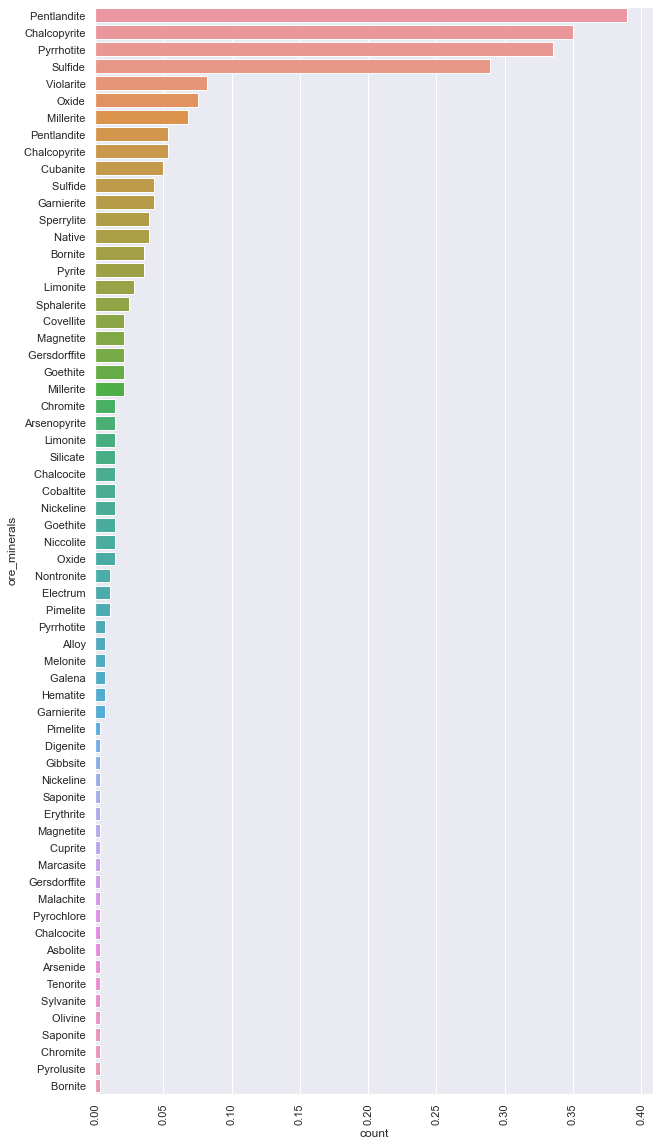

In [103]:
t = plt.figure(figsize=(10, 20))
ax = sns.barplot(y="ore_minerals", x='count', data=temp, orient='h')
t = plt.xticks(rotation=90)


# 矿点所有权

In [67]:
labels = main['owner_country'].value_counts().index.tolist()[:9]
main.loc[:, 'owner_country_new'] = main.loc[:, 'owner_country']
main.loc[~main['owner_country'].isin(labels), 'owner_country_new'] = 'others'


In [68]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="owner_country_new", data=main, order=main['owner_country_new'].value_counts().index)
t = plt.xticks(rotation=45)

In [69]:
labels = main['owner_country_new'].value_counts().index.tolist()
sizes = main['owner_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [70]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main.dropna(subset=['owner_pct', 'owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'owner_country_new',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        size_max = 10,
                        size = 'owner_pct',
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

矿点所有者数量的分布


<AxesSubplot:>

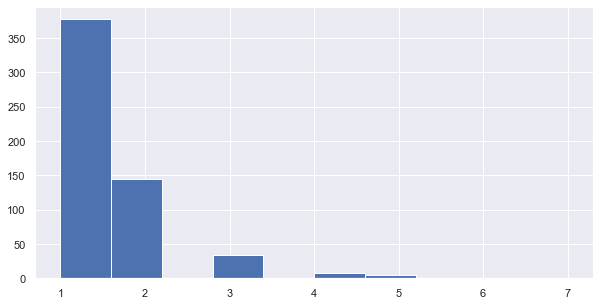

In [71]:
print('矿点所有者数量的分布')
main['num_royalty_owners'].hist(figsize=(10, 5))

In [72]:
import re
from collections import Counter
def extract(x):
    if not pd.isna(x):
        x = x.replace(',', '.')
        pct_lst = re.findall(r'\d+%', str(x))
        x = re.sub(r'[\d+%]', '', re.sub(r'\(.*?\)', '', str(x)))
        x_lst = x.split(';')
        x_lst = [i.replace('.', '').lstrip(" ").rstrip(" ") for i in x_lst]
        return x_lst#, pct_lst
    else:
        return None
    

In [73]:
main['owner_list_new'] = main['owner_list'].map(extract)
temp = []
for i in main['owner_list_new']:
    if i is not None:
        temp += i
        

In [74]:
temp = pd.Series(Counter(temp)).sort_values(ascending=False).reset_index().head(20)
temp.columns = ['company', 'count']


In [75]:
t = plt.figure(figsize=(10, 10))
t = sns.barplot(y='company', x='count', data=temp, orient='h')


# 最近一笔股份交易

In [76]:
col = feature_dic.loc[['transaction_details_1', 'transaction_details_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id   jv  deal_pct_acquired_announcement  \
0                 113 North    87482  Yes                       50.000000   
3                8 Mile Dam    86297  NaN                             NaN   
8                     Acoje    31679   No                       40.000000   
11  Adlay-Cagdianao-Tandawa    37537  NaN                             NaN   
14                    Agata    26731   No                        1.447001   

    deal_pct_acquired_completion  total_deal_value_announcement  \
0                            NaN                       0.289455   
3                            NaN                            NaN   
8                      40.000000                      68.658800   
11                           NaN                            NaN   
14                      1.447001                       0.050765   

    total_deal_value_completion rptd_currency_code  \
0                           NaN                CAD   
3                           NaN                NaN   
8                     68.658800                USD   
11                          NaN                NaN   
14                     0.050765                AUD   

                         buyer buyer_country                         seller  \
0        Mosaic Minerals Corp.        Canada       Fokus Mining Corporation   
3                          NaN           NaN                            NaN   
8   DMCI Holdings Incorporated   Philippines             D&A Income Limited   
11                         NaN           NaN                            NaN   
14           Undisclosed buyer           NaN  Contango Nominees Pty Limited   

    seller_country                prop_name  prop_id  \
0           Canada                113 North    87482   
3              NaN               8 Mile Dam    86297   
8   United Kingdom                    Acoje    31679   
11             NaN  Adlay-Cagdianao-Tandawa    37537   
14       Australia                    Agata    26731   

                           buyer_name_target_name                 deal_type  \
0         Mosaic Minerals Corp./113 North project  Metals & Mining Property   
3                                             NaN                       NaN   
8              DMCI Holdings Incorporated/ENK Plc   Metals & Mining Company   
11                                            NaN                       NaN   
14  Undisclosed buyer/Red Mountain Mining Limited   Metals & Mining Company   

                         target  target_country announce_date  \
0             113 North project          Canada    2021-06-08   
3                           NaN             NaN           NaT   
8                       ENK Plc  United Kingdom    2014-03-25   
11                          NaN             NaN           NaT   
14  Red Mountain Mining Limited       Australia    2016-11-07   

             deal_status completion_termination_date  \
0   Definitive Agreement                         NaT   
3                    NaN                         NaT   
8             Completion                  2014-03-25   
11                   NaN                         NaT   
14            Completion                  2016-11-07   

                   deal_consideration earn_in  
0   Capital Expenditure, Common Stock     Yes  
3                                 NaN     NaN  
8                        Unclassified      No  
11                                NaN     NaN  
14                       Unclassified      No

------------------------------------------------------------ 
缺失率统计


prop_name                          0.00
prop_id                            0.00
jv                                44.15
deal_pct_acquired_announcement    50.26
deal_pct_acquired_completion      65.27
total_deal_value_announcement     59.51
total_deal_value_completion       70.86
rptd_currency_code                44.15
buyer                             44.15
buyer_country                     53.05
seller                            44.15
seller_country                    52.88
prop_name                          0.00
prop_id                            0.00
buyer_name_target_name            44.15
deal_type                         44.15
target                            44.15
target_country                    44.68
announce_date                     44.15
deal_status                       44.15
completion_termination_date       55.67
deal_consideration                52.71
earn_in                           44.15
dtype: object

## 卖方

In [77]:
labels = main['seller_country'].value_counts().index.tolist()[:9]
main.loc[:, 'seller_country_new'] = main.loc[:, 'seller_country']
main.loc[~main['seller_country'].isin(labels), 'seller_country_new'] = 'others'


In [78]:
print('------------'*5, '\n矿点卖方国家的分布')


------------------------------------------------------------ 
矿点卖方国家的分布


In [79]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main.dropna(subset=['seller_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'seller_country_new',
                        title = 'nickel mine distribution',
                        zoom = 2,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


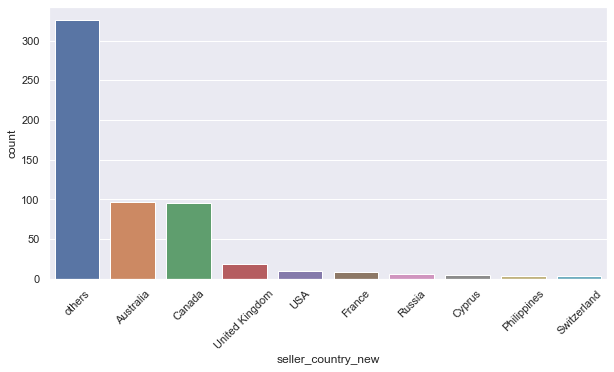

In [80]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="seller_country_new", data=main, order=main['seller_country_new'].value_counts().index)
t = plt.xticks(rotation=45)


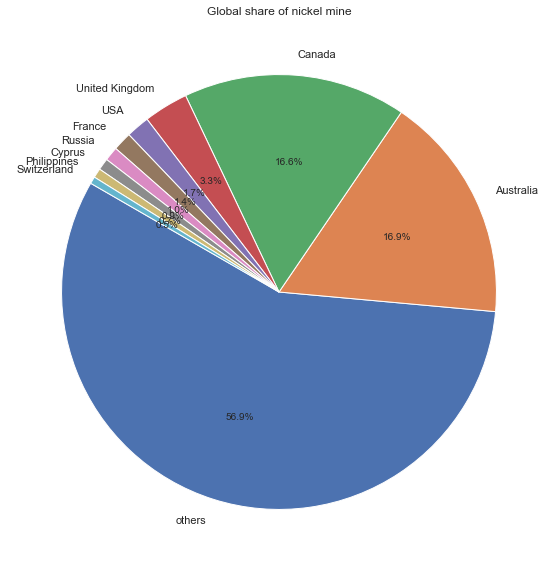

In [81]:
labels = main['seller_country_new'].value_counts().index.tolist()
sizes = main['seller_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


## 买方

In [82]:
labels = main['buyer_country'].value_counts().index.tolist()[:9]
main.loc[:, 'buyer_country_new'] = main.loc[:, 'buyer_country']
main.loc[~main['buyer_country'].isin(labels), 'buyer_country_new'] = 'others'


In [83]:
print('------------'*5, '\n矿点买方国家的分布')


------------------------------------------------------------ 
矿点买方国家的分布


In [84]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main.dropna(subset=['buyer_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'buyer_country_new',
                        title = 'nickel mine distribution',
                        zoom = 2,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

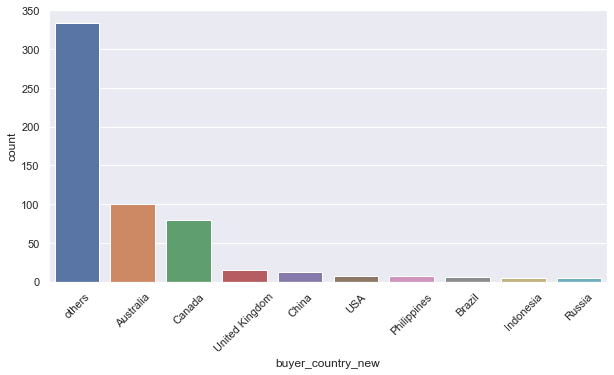

In [85]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="buyer_country_new", data=main, order=main['buyer_country_new'].value_counts().index)
t = plt.xticks(rotation=45)


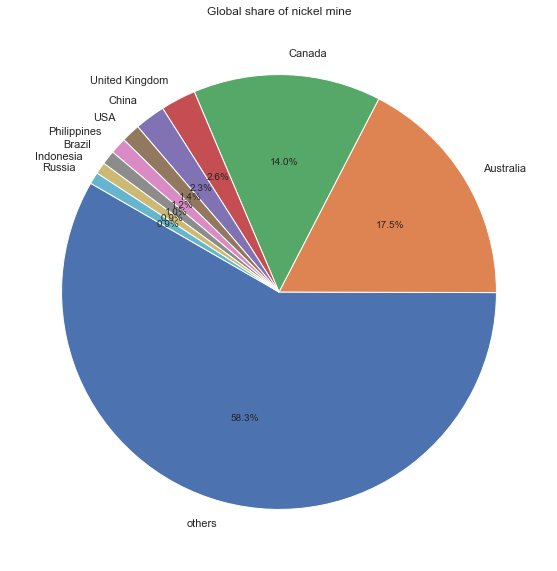

In [86]:
labels = main['buyer_country_new'].value_counts().index.tolist()
sizes = main['buyer_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [87]:
print('------------'*5, '\n矿点卖方-买房配对的数量统计')
main.apply(lambda x: str(x['seller_country']) + '_' + str(x['buyer_country']), axis=1).value_counts().head(10)

------------------------------------------------------------ 
矿点卖方-买房配对的数量统计


nan_nan                262
Australia_Australia     67
Canada_Canada           49
Australia_nan           14
nan_Australia           14
nan_Canada              14
Canada_Australia        10
Canada_nan               9
France_nan               8
Canada_USA               5
dtype: int64

# 矿点运营方

In [88]:
col = feature_dic.loc[['operator_1', 'operator_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id  \
0                 113 North    87482   
3                8 Mile Dam    86297   
8                     Acoje    31679   
11  Adlay-Cagdianao-Tandawa    37537   
14                    Agata    26731   

                                operator_name  operator_snl_instn_key  \
0                       Mosaic Minerals Corp.              10825361.0   
3                                      Emu NL               4349975.0   
8                         DMCI Holdings, Inc.               4349763.0   
11           CTP Construction and Mining Corp               4349603.0   
14  TVI Resource Development Philippines Inc.               4437431.0   

                         operator_common_name operator_company_name_abbrev  \
0                       Mosaic Minerals Corp.              Mosaic Minerals   
3                                      Emu NL                          EMU   
8                          DMCI Holdings Inc.               DMCI Hldgs Inc   
11               CTP Construction Mining Corp             CTP Construction   
14  TVI Resource Development Philippines Inc.                          TVI   

   operator_date_closing_price  operator_mkt_cap operator_price_to_ltm_eps  \
0                   2021-12-06          4.287518                        NM   
3                   2021-12-07          9.170437                       NaN   
8                   2021-12-07       2126.500646                       NaN   
11                         NaT               NaN                       NaN   
14                         NaT               NaN                       NaN   

    operator_tev                prop_name  prop_id operator_tev_to_ltm_ebitda  \
0       3.853402                113 North    87482                         NM   
3       7.933389               8 Mile Dam    86297                         NM   
8    3247.742688                    Acoje    31679                        NaN   
11           NaN  Adlay-Cagdianao-Tandawa    37537                        NaN   
14           NaN                    Agata    26731                        NaN   

   operator_total_debt_to_total_cap operator_price_to_earn_after_extra  \
0                                 0                                 NM   
3                               NaN                                 NM   
8                               NaN                           5.179487   
11                              NaN                                NaN   
14                              NaN                                NaN   

   operator_tev_to_ebitda operator_period_ended  operator_working_capital  \
0                      NM            2021-09-30              4.840317e+02   
3                      NM            2021-09-30                       NaN   
8                     NaN            2021-09-30              1.914137e+06   
11                    NaN                   NaT                       NaN   
14                    NaN            2015-06-30              1.197238e+04   

    operator_total_cap_at_bv  operator_total_debt  operator_current_liab  
0                1486.103861             0.000000              61.690315  
3                        NaN                  NaN                    NaN  
8                        NaN                  NaN          555884.080674  
11                       NaN                  NaN                    NaN  
14              50808.387547          8109.898148           11884.405236

------------------------------------------------------------ 
缺失率统计


prop_name                              0.00
prop_id                                0.00
operator_name                          1.22
operator_snl_instn_key                 1.22
operator_common_name                   1.22
operator_company_name_abbrev           2.27
operator_date_closing_price           34.21
operator_mkt_cap                      33.86
operator_price_to_ltm_eps             72.25
operator_tev                          38.92
prop_name                              0.00
prop_id                                0.00
operator_tev_to_ltm_ebitda            51.13
operator_total_debt_to_total_cap      69.11
operator_price_to_earn_after_extra    40.14
operator_tev_to_ebitda                47.64
operator_period_ended                 33.51
operator_working_capital              63.87
operator_total_cap_at_bv              64.40
operator_total_debt                   64.40
operator_current_liab                 63.87
dtype: object

# 矿点承包商

In [89]:
col = feature_dic.loc[['contractor']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id  contractor_id     contractor_name  \
0                 113 North    87482            NaN                 NaN   
3                8 Mile Dam    86297      4996275.0         ALS Limited   
8                     Acoje    31679            NaN                 NaN   
11  Adlay-Cagdianao-Tandawa    37537            NaN                 NaN   
14                    Agata    26731      4361239.0  Intertek Group plc   

   contractor_hq  begin_yr  begin_mo  end_yr  end_mo  proj_end_yr  \
0            NaN       NaN       NaN     NaN     NaN          NaN   
3             AU       NaN       NaN     NaN     NaN          NaN   
8            NaN       NaN       NaN     NaN     NaN          NaN   
11           NaN       NaN       NaN     NaN     NaN          NaN   
14            GB    2013.0       4.0  2013.0     4.0          NaN   

    proj_end_mo contractor_last_verified  
0           NaN                      NaT  
3           NaN                      NaT  
8           NaN                      NaT  
11          NaN                      NaT  
14          NaN                      NaT

------------------------------------------------------------ 
缺失率统计


prop_name                     0.00
prop_id                       0.00
contractor_id                70.16
contractor_name              70.16
contractor_hq                70.33
begin_yr                     81.50
begin_mo                     84.64
end_yr                       95.99
end_mo                       96.86
proj_end_yr                 100.00
proj_end_mo                 100.00
contractor_last_verified    100.00
dtype: object

# 矿点土地税

In [90]:
col = feature_dic.loc[['royalty_detail']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id    royalty_name  royalty_snl_instn_key  \
0                 113 North    87482             NaN                    NaN   
3                8 Mile Dam    86297             NaN                    NaN   
8                     Acoje    31679             NaN                    NaN   
11  Adlay-Cagdianao-Tandawa    37537             NaN                    NaN   
14                    Agata    26731  Local Interest              4351876.0   

          royalty_type  royalty_pct royalty_holder_hq royalty_holder_country  \
0                  NaN          NaN               NaN                    NaN   
3                  NaN          NaN               NaN                    NaN   
8                  NaN          NaN               NaN                    NaN   
11                 NaN          NaN               NaN                    NaN   
14  Net Smelter Return          1.0               NaN                    NaN   

   royalty_holder_global_region royalty_holder_phone royalty_holder_website  
0                           NaN                  NaN                    NaN  
3                           NaN                  NaN                    NaN  
8                           NaN                  NaN                    NaN  
11                          NaN                  NaN                    NaN  
14                          NaN                  NaN                    NaN

------------------------------------------------------------ 
缺失率统计


prop_name                        0.00
prop_id                          0.00
royalty_name                    77.14
royalty_snl_instn_key           77.14
royalty_type                    77.14
royalty_pct                     86.21
royalty_holder_hq               86.74
royalty_holder_country          79.58
royalty_holder_global_region    79.58
royalty_holder_phone            88.31
royalty_holder_website          87.43
dtype: object

# 资金成本

In [91]:
col = feature_dic.loc[['capital_cost']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id  amt_capital_invested  \
0                 113 North    87482                   NaN   
3                8 Mile Dam    86297                   NaN   
8                     Acoje    31679              498000.0   
11  Adlay-Cagdianao-Tandawa    37537                   NaN   
14                    Agata    26731               10100.0   

   capital_cost_announced_date capital_cost_proj_completion_date  \
0                          NaT                               NaT   
3                          NaT                               NaT   
8                   2008-11-27                               NaT   
11                         NaT                               NaT   
14                  2013-09-10                               NaT   

   capital_cost_completion_date     capital_cost_type  \
0                           NaT                   NaN   
3                           NaT                   NaN   
8                           NaT  Initial Capital Cost   
11                          NaT                   NaN   
14                   2014-03-31  Initial Capital Cost   

                                capital_cost_comments  capital_improvement_yr  
0                                                 NaN                     NaN  
3                                                 NaN                     NaN  
8                                                 NaN                  2008.0  
11                                                NaN                     NaN  
14  In September 2013, an updated feasibility stud...                  2014.0

------------------------------------------------------------ 
缺失率统计


prop_name                             0.00
prop_id                               0.00
amt_capital_invested                 77.84
capital_cost_announced_date          76.44
capital_cost_proj_completion_date    97.56
capital_cost_completion_date         94.59
capital_cost_type                    76.27
capital_cost_comments                77.49
capital_improvement_yr               76.27
dtype: object

------------------------------------------------------------ 
矿点的资金投入额的分布


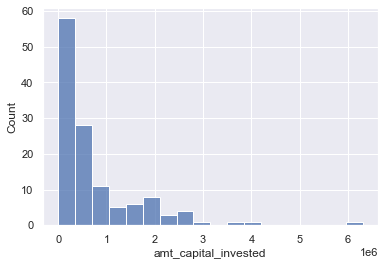

In [92]:
print('------------'*5, '\n矿点的资金投入额的分布')
t = sns.histplot(data=main, x='amt_capital_invested')

In [93]:
print('------------'*5, '\n矿点资金投入的地域分布')


------------------------------------------------------------ 
矿点资金投入的地域分布


In [94]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['amt_capital_invested'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'buyer_country_new',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        size = 'amt_capital_invested',
                        size_max = 40,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [95]:
print('------------'*5, '\n矿点资金投入类型的地域分布')


------------------------------------------------------------ 
矿点资金投入类型的地域分布


In [96]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['capital_cost_type'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'capital_cost_type',
                        title = 'nickel mine distribution',
                        zoom = 2,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 矿石产能

In [97]:
col = feature_dic.loc[['ore_capacity_1', 'ore_capacity_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id primary_commodity  start_up_yr  \
0                 113 North    87482            Nickel          NaN   
3                8 Mile Dam    86297            Nickel          NaN   
8                     Acoje    31679            Nickel       2008.0   
11  Adlay-Cagdianao-Tandawa    37537            Nickel          NaN   
14                    Agata    26731            Nickel       2014.0   

    start_up_calendar_qtr  proj_start_up_yr  proj_start_up_qtr  \
0                     NaN               NaN                NaN   
3                     NaN               NaN                NaN   
8                     1.0            2007.0                3.0   
11                    NaN               NaN                NaN   
14                    4.0            2015.0                NaN   

    actual_closure_yr  actual_closure_qtr  proj_closure_yr  proj_closure_qtr  \
0                 NaN                 NaN              NaN               NaN   
3                 NaN                 NaN              NaN               NaN   
8                 NaN                 NaN              NaN               NaN   
11                NaN                 NaN              NaN               NaN   
14                NaN                 NaN           2034.0               NaN   

    mill_capacity_tonnes_per_day  mill_capacity_tonnes_per_year  \
0                            NaN                            NaN   
3                            NaN                            NaN   
8                         4545.0                      1500000.0   
11                        6060.0                      2000000.0   
14                           NaN                            NaN   

    mill_capacity_cubic_m_per_day  mill_capacity_cubic_m_per_year  \
0                             NaN                             NaN   
3                             NaN                             NaN   
8                             NaN                             NaN   
11                            NaN                             NaN   
14                            NaN                             NaN   

                  prop_name  prop_id  stripping_ratio  waste_to_ore_ratio  \
0                 113 North    87482              NaN                 NaN   
3                8 Mile Dam    86297              NaN                 NaN   
8                     Acoje    31679              NaN                 NaN   
11  Adlay-Cagdianao-Tandawa    37537              NaN                 NaN   
14                    Agata    26731              NaN                 NaN   

                                mining_methods  \
0                                          NaN   
3                                          NaN   
8                                     Open Pit   
11                                    Open Pit   
14  Contour, Multiple Bench Open Pit, Open Pit   

                         processing_methods production_forms  \
0                                       NaN              NaN   
3                                       NaN              NaN   
8                                Heap Leach   Hydroxide, Ore   
11                                      NaN              Ore   
14  Crushing, Magnetic Separation, Smelting      Concentrate   

    mining_processing_cost_per_metric_tonne  \
0                                       NaN   
3                                       NaN   
8                                       NaN   
11                                      NaN   
14                                    13.14   

    mining_processing_cost_per_cubic_m  
0                                  NaN  
3                                  NaN  
8                                  NaN  
11                                 NaN  
14                                 NaN

------------------------------------------------------------ 
缺失率统计


prop_name                                    0.00
prop_id                                      0.00
primary_commodity                            0.00
start_up_yr                                 82.55
start_up_calendar_qtr                       90.05
proj_start_up_yr                            84.47
proj_start_up_qtr                           92.32
actual_closure_yr                           96.34
actual_closure_qtr                          98.25
proj_closure_yr                             88.31
proj_closure_qtr                            99.13
mill_capacity_tonnes_per_day                83.07
mill_capacity_tonnes_per_year               83.07
mill_capacity_cubic_m_per_day              100.00
mill_capacity_cubic_m_per_year             100.00
prop_name                                    0.00
prop_id                                      0.00
stripping_ratio                             96.51
waste_to_ore_ratio                          99.48
mining_methods                              69.28


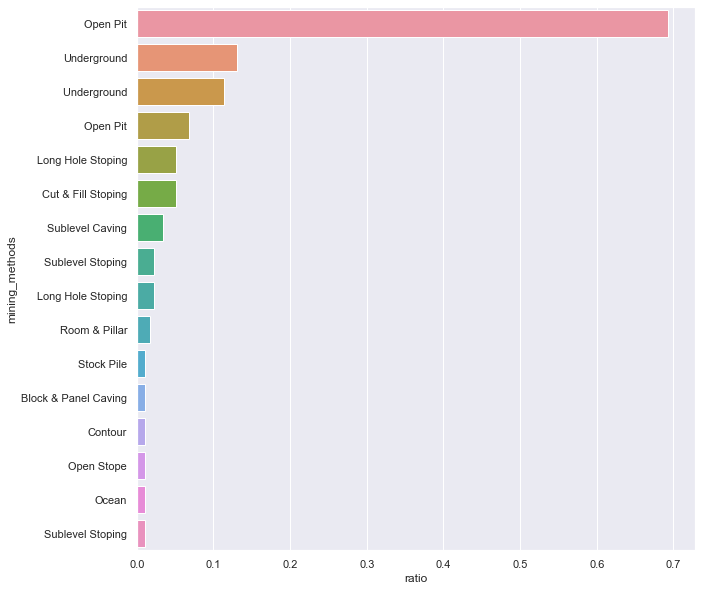

In [98]:
temp = main['mining_methods'].str.split(',', expand=True).add_prefix('mining_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['mining_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['mining_methods', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='mining_methods', x='ratio', orient='h')

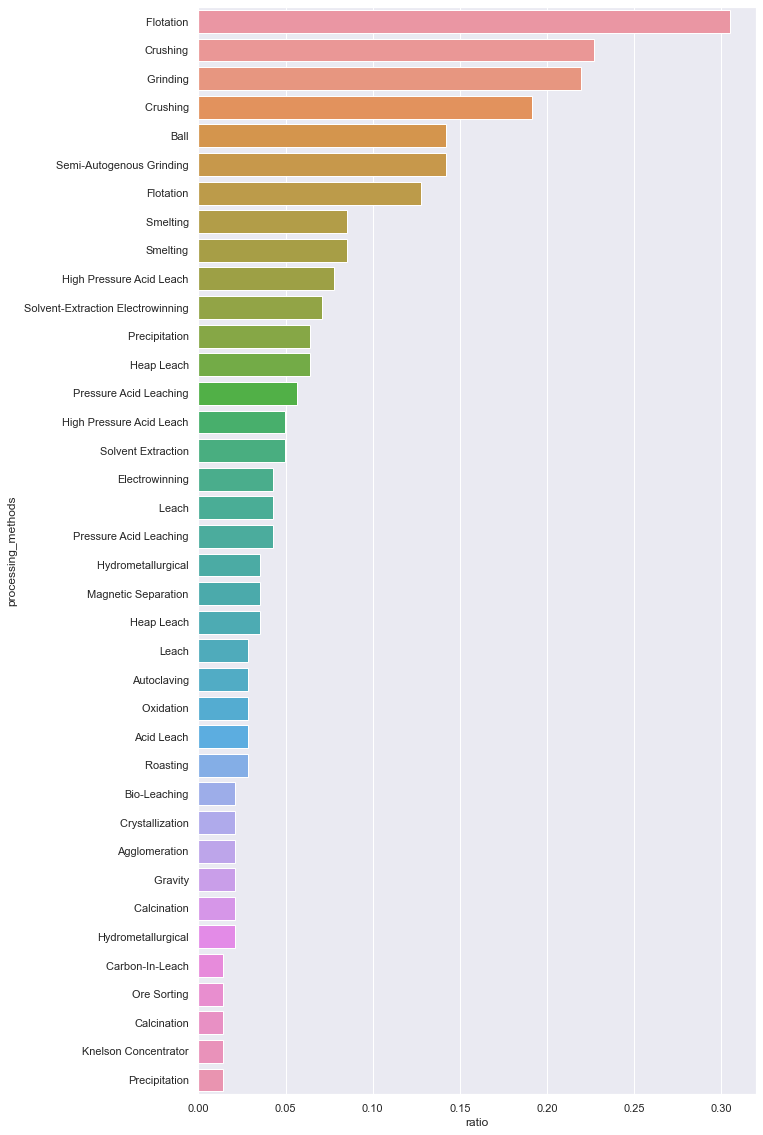

In [99]:
temp = main['processing_methods'].str.split(',', expand=True).add_prefix('processing_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['processing_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['processing_methods', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 20))
t = sns.barplot(data=temp, y='processing_methods', x='ratio', orient='h')

------------------------------------------------------------ 
矿点产出矿物形式的分布


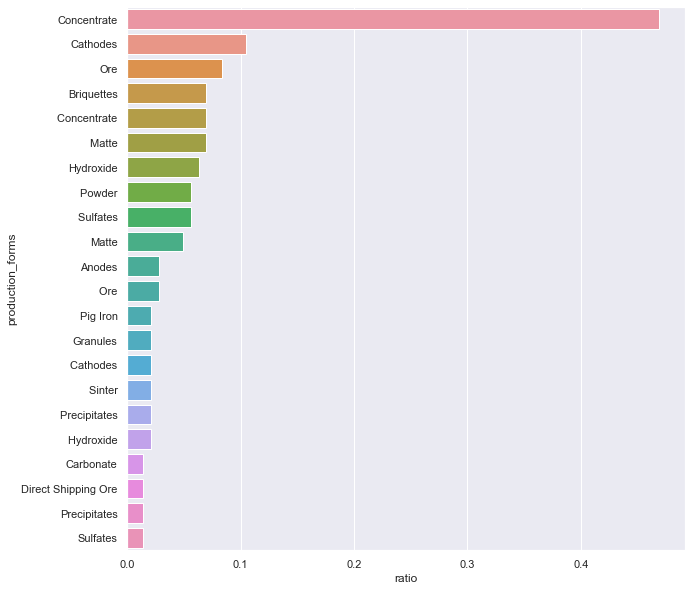

In [100]:
print('------------'*5, '\n矿点产出矿物形式的分布')

temp = main['production_forms'].str.split(',', expand=True).add_prefix('production_forms')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['production_forms'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['production_forms', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='production_forms', x='ratio', orient='h')

In [101]:
print('------------'*5, '\n矿点日产能数额的分布')


------------------------------------------------------------ 
矿点日产能数额的分布


In [102]:
t = sns.histplot(main, x='mining_processing_cost_per_metric_tonne')

In [103]:
print('------------'*5, '\n矿点日产能数额的国家分布')

temp = main.groupby('country_name')['mining_processing_cost_per_metric_tonne'].mean().dropna().sort_values().to_frame()
temp.style.background_gradient()

------------------------------------------------------------ 
矿点日产能数额的国家分布


In [104]:
print('------------'*5, '\n矿点日产能的地域分布')


------------------------------------------------------------ 
矿点日产能的地域分布


In [105]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'actv_status',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        size = main['mill_capacity_tonnes_per_day'].fillna(0),
                        hover_data = ['mill_capacity_tonnes_per_day'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 商品产能

In [106]:
col = feature_dic.loc[['commodity_capacity_1', 'commodity_capacity_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id  millhead_grade_g_per_tonne  \
0                 113 North    87482                         NaN   
3                8 Mile Dam    86297                         NaN   
8                     Acoje    31679                         NaN   
11  Adlay-Cagdianao-Tandawa    37537                         NaN   
14                    Agata    26731                         NaN   

    millhead_grade_g_per_cubic_m  millhead_grade_pct  \
0                            NaN                 NaN   
3                            NaN                 NaN   
8                            NaN                 NaN   
11                           NaN                 NaN   
14                           NaN                 NaN   

    millhead_grade_ct_per_tonne  millhead_grade_ct_per_cubic_m  recov_rate  \
0                           NaN                            NaN         NaN   
3                           NaN                            NaN         NaN   
8                           NaN                            NaN         NaN   
11                          NaN                            NaN         NaN   
14                          NaN                            NaN         NaN   

    production_capacity_oz  production_capacity_tonne  production_capacity_lb  \
0                      NaN                        NaN                     NaN   
3                      NaN                        NaN                     NaN   
8                      NaN                        NaN                     NaN   
11                     NaN                        NaN                     NaN   
14                     NaN                        NaN                     NaN   

    production_capacity_ct                prop_name  prop_id  \
0                      NaN                113 North    87482   
3                      NaN               8 Mile Dam    86297   
8                      NaN                    Acoje    31679   
11                     NaN  Adlay-Cagdianao-Tandawa    37537   
14                     NaN                    Agata    26731   

    cash_cost_per_oz  cash_cost_per_tonne  cash_cost_per_lb  cash_cost_per_ct  \
0                NaN                  NaN               NaN               NaN   
3                NaN                  NaN               NaN               NaN   
8                NaN                  NaN               NaN               NaN   
11               NaN                  NaN               NaN               NaN   
14               NaN                  NaN               NaN               NaN   

    total_production_cost_per_oz  total_production_cost_per_tonne  \
0                            NaN                              NaN   
3                            NaN                              NaN   
8                            NaN                              NaN   
11                           NaN                              NaN   
14                           NaN                              NaN   

    total_production_cost_per_lb  total_production_cost_per_ct  \
0                            NaN                           NaN   
3                            NaN                           NaN   
8                            NaN                           NaN   
11                           NaN                           NaN   
14                           NaN                           NaN   

    all_in_sustaining_cost_per_oz  all_in_sustaining_cost_per_tonne  \
0                             NaN                               NaN   
3                             NaN                               NaN   
8                             NaN                               NaN   
11                            NaN                               NaN   
14                            NaN                               NaN   

    all_in_sustaining_cost_per_lb  all_in_sustaining_cost_per_ct  
0                             NaN                            NaN  
3                             NaN                            NaN  
8   

------------------------------------------------------------ 
缺失率统计


prop_name                             0.00
prop_id                               0.00
millhead_grade_g_per_tonne           99.13
millhead_grade_g_per_cubic_m        100.00
millhead_grade_pct                  100.00
millhead_grade_ct_per_tonne         100.00
millhead_grade_ct_per_cubic_m       100.00
recov_rate                           99.48
production_capacity_oz               99.13
production_capacity_tonne           100.00
production_capacity_lb              100.00
production_capacity_ct              100.00
prop_name                             0.00
prop_id                               0.00
cash_cost_per_oz                     99.83
cash_cost_per_tonne                 100.00
cash_cost_per_lb                    100.00
cash_cost_per_ct                    100.00
total_production_cost_per_oz         99.83
total_production_cost_per_tonne     100.00
total_production_cost_per_lb        100.00
total_production_cost_per_ct        100.00
all_in_sustaining_cost_per_oz        99.83
all_in_sust

缺失率过高，无法使用

# 矿产储量

In [107]:
col = feature_dic.loc[['tonnage_and_volume']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id primary_commodity r_and_r_as_of  \
0                 113 North    87482            Nickel    2021-06-09   
3                8 Mile Dam    86297            Nickel           NaT   
8                     Acoje    31679            Nickel    2012-03-15   
11  Adlay-Cagdianao-Tandawa    37537            Nickel           NaT   
14                    Agata    26731            Nickel    2013-08-30   

    resv_ore_tonnage  meas_ind_ore_tonnage  inf_resrc_ore_tonnage  \
0                0.0                   0.0             42000000.0   
3                NaN                   NaN                    NaN   
8                0.0            40900000.0             29000000.0   
11               NaN                   NaN                    NaN   
14        40490000.0            32243000.0              2838000.0   

    total_resrc_ore_tonnage  r_and_r_ore_tonnage  \
0                42000000.0           42000000.0   
3                       NaN                  NaN   
8                69900000.0           69900000.0   
11                      NaN                  NaN   
14               35081000.0           75571000.0   

    meas_ind_ore_tonnage_incl_resv  
0                              0.0  
3                              NaN  
8                       40900000.0  
11                             NaN  
14                      72733000.0

------------------------------------------------------------ 
缺失率统计


prop_name                          0.00
prop_id                            0.00
primary_commodity                  0.00
r_and_r_as_of                     62.83
resv_ore_tonnage                  66.84
meas_ind_ore_tonnage              71.03
inf_resrc_ore_tonnage             68.94
total_resrc_ore_tonnage           66.84
r_and_r_ore_tonnage               65.62
meas_ind_ore_tonnage_incl_resv    69.81
dtype: object

In [108]:
print('------------'*5, '\n矿点储量地域分布的散点图')

------------------------------------------------------------ 
矿点储量地域分布的散点图


In [109]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'actv_status',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        size = main['r_and_r_ore_tonnage'].fillna(0),
                        hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [110]:
print('------------'*5, '\n矿点储量地域分布的热点图')


------------------------------------------------------------ 
矿点储量地域分布的热点图


In [111]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.density_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        z = 'r_and_r_ore_tonnage',
                        radius = 20,
                        hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 矿石品位

In [112]:
col = feature_dic.loc[['grade_and_contained']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))

------------------------------------------------------------ 
示例


prop_name  prop_id  grd_resv_g_per_tonne  \
0                 113 North    87482                   NaN   
3                8 Mile Dam    86297                   NaN   
8                     Acoje    31679                   NaN   
11  Adlay-Cagdianao-Tandawa    37537                   NaN   
14                    Agata    26731                   NaN   

    contained_resv_oz_g_per_tonne  grd_meas_ind_g_per_tonne  \
0                             NaN                       NaN   
3                             NaN                       NaN   
8                             NaN                       NaN   
11                            NaN                       NaN   
14                            NaN                       NaN   

    contained_meas_ind_oz_g_per_tonne  grd_inf_g_per_tonne  \
0                                 NaN                  NaN   
3                                 NaN                  NaN   
8                                 NaN                  NaN   
11                                NaN                  NaN   
14                                NaN                  NaN   

    contained_inf_oz_g_per_tonne  grd_total_resrc_g_per_tonne  \
0                            NaN                          NaN   
3                            NaN                          NaN   
8                            NaN                          NaN   
11                           NaN                          NaN   
14                           NaN                          NaN   

    contained_total_resrc_oz_g_per_tonne  grd_r_and_r_g_per_tonne  \
0                                    NaN                      NaN   
3                                    NaN                      NaN   
8                                    NaN                      NaN   
11                                   NaN                      NaN   
14                                   NaN                      NaN   

    contained_r_and_r_oz_g_per_tonne  grd_meas_ind_incl_resv_g_per_tonne  \
0                                NaN                                 NaN   
3                                NaN                                 NaN   
8                                NaN                                 NaN   
11                               NaN                                 NaN   
14                               NaN                                 NaN   

    contained_meas_ind_incl_resv_oz_g_per_tonne  
0                                           NaN  
3                                           NaN  
8                                           NaN  
11                                          NaN  
14                                          NaN

------------------------------------------------------------ 
缺失率统计


prop_name                                       0.00
prop_id                                         0.00
grd_resv_g_per_tonne                           98.43
contained_resv_oz_g_per_tonne                  95.64
grd_meas_ind_g_per_tonne                       97.38
contained_meas_ind_oz_g_per_tonne              95.99
grd_inf_g_per_tonne                            96.16
contained_inf_oz_g_per_tonne                   95.81
grd_total_resrc_g_per_tonne                    96.16
contained_total_resrc_oz_g_per_tonne           95.81
grd_r_and_r_g_per_tonne                        95.64
contained_r_and_r_oz_g_per_tonne               95.64
grd_meas_ind_incl_resv_g_per_tonne             96.86
contained_meas_ind_incl_resv_oz_g_per_tonne    95.81
dtype: object

# 矿点世界排名

In [113]:
col = feature_dic.loc[['production_rank']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))

------------------------------------------------------------ 
示例


prop_name  prop_id  global_rank_by_commodity  \
0                 113 North    87482                       NaN   
3                8 Mile Dam    86297                       NaN   
8                     Acoje    31679                       NaN   
11  Adlay-Cagdianao-Tandawa    37537                       NaN   
14                    Agata    26731                       NaN   

    global_production_value_by_commodity  share_of_world_by_commodity  \
0                                    NaN                          NaN   
3                                    NaN                          NaN   
8                                    NaN                          NaN   
11                                   NaN                          NaN   
14                                   NaN                          NaN   

   actual_estimate_forecast as_of_date  global_rank_all_commodities  \
0                       NaN        NaT                          NaN   
3                       NaN        NaT                          NaN   
8                       NaN        NaT                          NaN   
11                      NaN        NaT                          NaN   
14                      NaN 2020-12-31                        373.0   

    global_production_value_all_commodities  share_of_world_all_commodities  
0                                       NaN                             NaN  
3                                       NaN                             NaN  
8                                       NaN                             NaN  
11                                      NaN                             NaN  
14                                   345.43                          0.0501

------------------------------------------------------------ 
缺失率统计


prop_name                                   0.00
prop_id                                     0.00
global_rank_by_commodity                   98.25
global_production_value_by_commodity       98.25
share_of_world_by_commodity                98.25
actual_estimate_forecast                   98.25
as_of_date                                 88.66
global_rank_all_commodities                88.66
global_production_value_all_commodities    88.66
share_of_world_all_commodities             88.66
dtype: object

In [114]:
print('------------'*5, '\n矿点生产价值排名的分布')


------------------------------------------------------------ 
矿点生产价值排名的分布


In [115]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['global_production_value_all_commodities'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'global_production_value_all_commodities',
                        zoom = 2,
                        size = 'global_production_value_all_commodities',
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [116]:
print('------------'*5, '\n矿点世界排名的分布')


------------------------------------------------------------ 
矿点世界排名的分布


In [117]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['global_rank_all_commodities'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'global_rank_all_commodities',
                        zoom = 2,
                        size = main['global_rank_all_commodities'].max()-main[main['global_rank_all_commodities'].notnull()]['global_rank_all_commodities']+1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [118]:
print('------------'*5, '\n矿点配额世界排名的分布')


------------------------------------------------------------ 
矿点配额世界排名的分布


In [119]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['share_of_world_all_commodities'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'share_of_world_all_commodities',
                        zoom = 2,
                        size = 'share_of_world_all_commodities',
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 钻孔相关

In [120]:
col = feature_dic.loc[['drill_hole', 'drill_interval_grade']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))

------------------------------------------------------------ 
示例


prop_name  prop_id  interval_id hole_id  date_rptd  \
0                 113 North    87482          NaN     NaN        NaT   
3                8 Mile Dam    86297          NaN     NaN        NaT   
8                     Acoje    31679          NaN     NaN        NaT   
11  Adlay-Cagdianao-Tandawa    37537          NaN     NaN        NaT   
14                    Agata    26731     221344.0   KL-19 2011-01-12   

                      rptd_by  interval  depth      explor_purpose  \
0                         NaN       NaN    NaN                 NaN   
3                         NaN       NaN    NaN                 NaN   
8                         NaN       NaN    NaN                 NaN   
11                        NaN       NaN    NaN                 NaN   
14  Mindoro Resources Limited     11.85    NaN  New Zone/Satellite   

   significant_interval primary_interval_commodity interval_commodities  \
0                   NaN                        NaN                  NaN   
3                   NaN                        NaN                  NaN   
8                   NaN                        NaN                  NaN   
11                  NaN                        NaN                  NaN   
14                   No                     Nickel               Nickel   

    interval_value                prop_name  prop_id  \
0              NaN                113 North    87482   
3              NaN               8 Mile Dam    86297   
8              NaN                    Acoje    31679   
11             NaN  Adlay-Cagdianao-Tandawa    37537   
14      1504.84335                    Agata    26731   

    interval_grade_g_per_tonne  grade_x_interval_g_per_tonne  \
0                          NaN                           NaN   
3                          NaN                           NaN   
8                          NaN                           NaN   
11                         NaN                           NaN   
14                         NaN                           NaN   

    interval_grade_equiv_g_per_tonne  grade_equiv_x_interval_g_per_tonne  \
0                                NaN                                 NaN   
3                                NaN                                 NaN   
8                                NaN                                 NaN   
11                               NaN                                 NaN   
14                               NaN                                 NaN   

    interval_grade_pct  grade_x_interval_pct  interval_grade_equiv_pct  \
0                  NaN                   NaN                       NaN   
3                  NaN                   NaN                       NaN   
8                  NaN                   NaN                       NaN   
11                 NaN                   NaN                       NaN   
14                 NaN                   NaN                       NaN   

    grade_equiv_x_interval_pct  interval_grade_ppm  grade_x_interval_ppm  \
0                          NaN                 NaN                   NaN   
3                          NaN                 NaN                   NaN   
8                          NaN                 NaN                   NaN   
11                         NaN                 NaN                   NaN   
14                         NaN                 NaN                   NaN   

    interval_grade_equiv_ppm  grade_equiv_x_interval_ppm  
0                        NaN                         NaN  
3                        NaN                         NaN  
8                        NaN                         NaN  
11                       NaN                         NaN  
14                       NaN                         NaN

------------------------------------------------------------ 
缺失率统计


prop_name                               0.00
prop_id                                 0.00
interval_id                            69.63
hole_id                                69.63
date_rptd                              69.63
rptd_by                                69.63
interval                               69.63
depth                                  86.56
explor_purpose                         69.63
significant_interval                   69.63
primary_interval_commodity             69.63
interval_commodities                   69.63
interval_value                         69.63
prop_name                               0.00
prop_id                                 0.00
interval_grade_g_per_tonne             90.92
grade_x_interval_g_per_tonne           90.92
interval_grade_equiv_g_per_tonne       90.92
grade_equiv_x_interval_g_per_tonne     90.92
interval_grade_pct                     81.15
grade_x_interval_pct                   81.15
interval_grade_equiv_pct               81.15
grade_equi

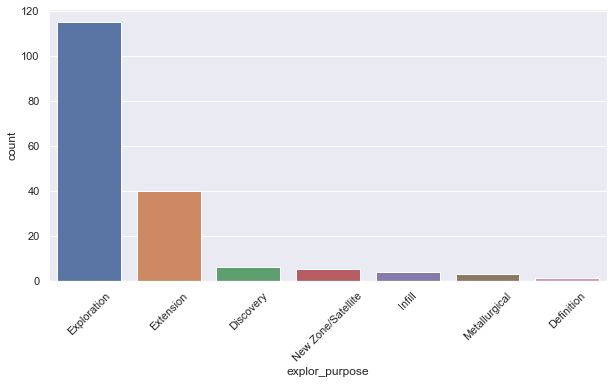

In [121]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="explor_purpose", data=main, order=main['explor_purpose'].value_counts().index)
t = plt.xticks(rotation=45)

In [122]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['explor_purpose'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'explor_purpose',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 评论 + 声明

In [123]:
col = feature_dic.loc[['comment', 'claim']][1].tolist()
# main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
缺失率统计


prop_name             0.00
prop_id               0.00
general_comments     18.32
full_work_history    39.27
enviro_comments      93.72
subcontractors       74.52
prop_name             0.00
prop_id               0.00
description_claim    38.92
dtype: object

In [124]:
print('--------'*10, '\n', 'general_comments')
main['general_comments'][0]
print('--------'*10, '\n', 'full_work_history')
main['full_work_history'][0]
print('--------'*10, '\n', 'enviro_comments')
main['enviro_comments'][109]
print('--------'*10, '\n', 'subcontractors')
main['subcontractors'][8]
print('--------'*10, '\n', 'description_claim')
main['description_claim'][8]


-------------------------------------------------------------------------------- 
 general_comments


'In August 2021, Mosaic received all drill permits for a planned 1,500-m drill program at 113 North. (Mosaic PR Aug 26, 2021)_x000D_\n   In June 2021, Mosaic completed geophysical survey and planned 2,000-m drill program at 113 North. (Mosaic PR June 9, 2021)'

-------------------------------------------------------------------------------- 
 full_work_history


'2001: a pyroxenite intrusion located 400 m south of the project was excavated over 100 m. A mineralized zone at the northern contact of the intrusion with the volcanics was observed over 20 m long by 10 m wide. A GCF-08-07 historical diamond drill hole revealed grades of 0.4396 _x000D_\nppm Cu, 0.3742 ppm Ni, 0.25 g/t Pt, 0.23 g/t Pd and 0.18g/t Au over 21.20 m. (Mosaic PR June 9, 2021)'

-------------------------------------------------------------------------------- 
 enviro_comments


'In September 2011, Proto arranged to purchase 105 ha of private land adjacent to the proposed mine site including 87 ha of native habitat to offset environmental impacts. (Proto PR 9/28/11)'

-------------------------------------------------------------------------------- 
 subcontractors


'In the April 2009 quarter, China Tianchan Engineering began work on the Acoje feasibility study. (Rusina 3/09 QR 4/27/09)_x000D_\n\tIn April 2008, SRK was working on mine design, scheduling, and haulage; Wardrop/Westmar were working on infrastructure and port options; and Gaia South and Citrus were working on the environmental and social impact assessment. (Rusina 3/08 QR 4/30/08)_x000D_\n   During the December 2005 quarter, Snowden Mining Industry Consultants, in conjunction with Rusina geological staff, completed the first resource estimate for Acoje since the mine closure in the 1980’s. R. W. Bourne & Associates were commissioned to carry out preliminary metallurgical testwork for the project. (Rusina 12/05 QR 1/31/06)_x000D_\n   In September 2005, Rusina was settling a mining contract with Paramina Earth Technologies for refurbishing and renewing access to the 1250 level portal and development drives. (Rusina PR 9/20/05)'

-------------------------------------------------------------------------------- 
 description_claim


'In February 2017, DENR issued an order cancelling the Mineral Production Sharing Agreement (MPSA) based on the suspension imposed on July 7, 2016. _x000D_\nAs of year ended December 2016, Acoje was located within MPSA No. 191-2004-III. (DMCI 12/16 AR May 16, 2017) _x000D_\n  In May 2007, European Nickel held a 40% interest in all nickel laterite resources at Acoje. (Rusina PR 5/9/07)_x000D_\n\tIn October 2006, there were three ports and a 600-MW coal fired power plant at Masinloc, all within 30 km of Acoje. (Rusina 6/06 AR 10/30/06)_x000D_\n\tIn September 2005, the property was under a 25-year granted mineral lease (Mineral Production Sharing Agreement), which was renewable for another 25 years. The property covered an area with a strike length of 11 km. (Rusina PR 9/20/05)'

暂时没有能力和时间进行NLP

# 煤相关

In [125]:
col = feature_dic.loc[['coal_details']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id coal_uses  economic_coal_seam_count  \
0                 113 North    87482       NaN                       NaN   
3                8 Mile Dam    86297       NaN                       NaN   
8                     Acoje    31679       NaN                       NaN   
11  Adlay-Cagdianao-Tandawa    37537       NaN                       NaN   
14                    Agata    26731       NaN                       NaN   

    total_coal_seam_count transport_method_coal_details  \
0                     NaN                           NaN   
3                     NaN                           NaN   
8                     NaN                           NaN   
11                    NaN                           NaN   
14                    NaN                           NaN   

   shipping_port_coal_detail coal_seam coal_rank coal_rank_abbrev coal_group  \
0                        NaN       NaN       NaN              NaN        NaN   
3                        NaN       NaN       NaN              NaN        NaN   
8                        NaN       NaN       NaN              NaN        NaN   
11                       NaN       NaN       NaN              NaN        NaN   
14                       NaN       NaN       NaN              NaN        NaN   

   transport_method_coal_transport  shipping_port_coal_transport export  dom  
0                              NaN                           NaN    NaN  NaN  
3                              NaN                           NaN    NaN  NaN  
8                              NaN                           NaN    NaN  NaN  
11                             NaN                           NaN    NaN  NaN  
14                             NaN                           NaN    NaN  NaN

------------------------------------------------------------ 
缺失率统计


prop_name                            0.00
prop_id                              0.00
coal_uses                          100.00
economic_coal_seam_count           100.00
total_coal_seam_count              100.00
transport_method_coal_details       98.60
shipping_port_coal_detail           99.65
coal_seam                          100.00
coal_rank                          100.00
coal_rank_abbrev                   100.00
coal_group                         100.00
transport_method_coal_transport    100.00
shipping_port_coal_transport       100.00
export                             100.00
dom                                100.00
dtype: object

缺失率过高，不可用

# 原矿生产和支出

In [126]:
col = feature_dic.loc[['ore_production_and_costs']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id as_of_date_production  \
0                 113 North    87482                   NaT   
3                8 Mile Dam    86297                   NaT   
8                     Acoje    31679                   NaT   
11  Adlay-Cagdianao-Tandawa    37537                   NaT   
14                    Agata    26731                   NaT   

    mining_processing_cost_per_tonne_by_period  \
0                                          NaN   
3                                          NaN   
8                                          NaN   
11                                         NaN   
14                                         NaN   

    mining_processing_cost_per_cubic_m_by_period  \
0                                            NaN   
3                                            NaN   
8                                            NaN   
11                                           NaN   
14                                           NaN   

    production_cost_comments_by_period  ore_processed_mass_by_period  \
0                                  NaN                           NaN   
3                                  NaN                           NaN   
8                                  NaN                           NaN   
11                                 NaN                           NaN   
14                                 NaN                           NaN   

    ore_processed_volume_by_period  \
0                              NaN   
3                              NaN   
8                              NaN   
11                             NaN   
14                             NaN   

   mining_production_general_comments_by_period forecast_date  \
0                                           NaN           NaT   
3                                           NaN           NaT   
8                                           NaN           NaT   
11                                          NaN           NaT   
14                                          NaN           NaT   

   actual_estimate_forecast_production  
0                                  NaN  
3                                  NaN  
8                                  NaN  
11                                 NaN  
14                                 NaN

------------------------------------------------------------ 
缺失率统计


prop_name                                         0.00
prop_id                                           0.00
as_of_date_production                            89.70
mining_processing_cost_per_tonne_by_period      100.00
mining_processing_cost_per_cubic_m_by_period    100.00
production_cost_comments_by_period              100.00
ore_processed_mass_by_period                     96.34
ore_processed_volume_by_period                  100.00
mining_production_general_comments_by_period    100.00
forecast_date                                   100.00
actual_estimate_forecast_production              89.70
dtype: object

缺失率高，基本不可用

# 总结

1. 矿点基本信息（名称、位置）
2. 矿点各利益方信息
3. 矿点品位、储量、产能相关信息


其中1、2部分的数据可用。3缺失率过高，不推荐使用，需要通过其他方式进行数据补齐。